# Trabajo Final Integrador

El objetivo del presente trabajo es resolver un problema típico de análisis de datos, utilizando todas las herramientas vistas durante el cursado.

En la resolución se deberán utilizar todas las herramientas vistas durante el curso, a fin de evaluar la comprensión de las mismas y la correcta utilización de herramientas y técnicas vistas.

## Enunciado

Se utilizará para el trabajo un set de datos correspondiente a los viajes realizados por el servicio de Taxis de la ciudad de Nueva York.

Cada punto a resolver se colocará en una sección aparte debajo de la cual se encuenta la celda en la que se colocará el código correspondiente a la resolución del tema pedido.

Se pueden agregar mas celdas en pos de la claridad en el planteo o para generar resultados intermedios.

### Importación inicial y carga de datos (NO MODIFICAR)

In [1]:
import seaborn as sns
import pandas as pd
sns.set(style='darkgrid')

"""
NO MODIFICAR ESTAS LINEAS.
SON LAS RESPONSABLES DE CARGAR LOS DATOS
Y RENOMBRAR LAS COLUMNAS, PARA REALIZAR LOS ANÁLISIS
"""
df = sns.load_dataset("taxis")
df = df.rename(columns={
    'pickup':'fecha_hora_subida','dropoff':'fecha_hora_bajada',
    'passengers':'pasajeros','distance':'distancia',
    'fare':'tarifa','tip':'propina','tolls':'peajes',
    'payment':'pago',
    'pickup_zone':'zona_subida','dropoff_zone':'zona_bajada',
    'pickup_borough':'barrio_subida','dropoff_borough':'barrio_bajada'})
df['fecha'] = df['fecha_hora_subida'].dt.date # Crear una columna que contenga solamente fecha, sin hora
df['hora_subida'] = df['fecha_hora_subida'].dt.time
df['hora_bajada'] = df['fecha_hora_bajada'].dt.time
df['duracion'] = df['fecha_hora_bajada']-df['fecha_hora_subida']

In [2]:
 df['barrio_subida'].unique()
df.info()
 df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   fecha_hora_subida  6433 non-null   datetime64[ns] 
 1   fecha_hora_bajada  6433 non-null   datetime64[ns] 
 2   pasajeros          6433 non-null   int64          
 3   distancia          6433 non-null   float64        
 4   tarifa             6433 non-null   float64        
 5   propina            6433 non-null   float64        
 6   peajes             6433 non-null   float64        
 7   total              6433 non-null   float64        
 8   color              6433 non-null   object         
 9   pago               6389 non-null   object         
 10  zona_subida        6407 non-null   object         
 11  zona_bajada        6388 non-null   object         
 12  barrio_subida      6407 non-null   object         
 13  barrio_bajada      6388 non-null   object       

,fecha_hora_subida,fecha_hora_bajada,pasajeros,distancia,tarifa,propina,peajes,total,color,pago,zona_subida,zona_bajada,barrio_subida,barrio_bajada,fecha,hora_subida,hora_bajada,duracion
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,2019-03-23,20:21:09,20:27:24,0 days 00:06:15
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,2019-03-04,16:11:55,16:19:00,0 days 00:07:05
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,2019-03-27,17:53:01,18:00:25,0 days 00:07:24
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,2019-03-10,01:23:59,01:49:51,0 days 00:25:52
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,2019-03-30,13:27:42,13:37:14,0 days 00:09:32


### Describir el set de datos y mostrar algunos indicadores estadísticos relevantes

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pasajeros,6433.0,1.539251,1.203768,0.0,1.0,1.0,2.0,6.0
distancia,6433.0,3.024617,3.827867,0.0,0.98,1.64,3.21,36.7
tarifa,6433.0,13.091073,11.551804,1.0,6.5,9.5,15.0,150.0
propina,6433.0,1.97922,2.44856,0.0,0.0,1.7,2.8,33.2
peajes,6433.0,0.325273,1.415267,0.0,0.0,0.0,0.0,24.02
total,6433.0,18.517794,13.81557,1.3,10.8,14.16,20.3,174.82
duracion,6433,0 days 00:14:20.976993626,0 days 00:11:38.633516153,0 days 00:00:00,0 days 00:06:30,0 days 00:10:54,0 days 00:18:31,0 days 01:47:40


In [4]:
# Colocar el código debajo de este comentario
df.tail()

,fecha_hora_subida,fecha_hora_bajada,pasajeros,distancia,tarifa,propina,peajes,total,color,pago,zona_subida,zona_bajada,barrio_subida,barrio_bajada,fecha,hora_subida,hora_bajada,duracion
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan,2019-03-31,09:51:53,09:55:27,0 days 00:03:34
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx,2019-03-31,17:38:00,18:34:23,0 days 00:56:23
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn,2019-03-23,22:55:18,23:14:25,0 days 00:19:07
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn,2019-03-04,10:09:25,10:14:29,0 days 00:05:04
6432,2019-03-13 19:31:22,2019-03-13 19:48:02,1,3.85,15.0,3.36,0.0,20.16,green,credit card,Boerum Hill,Windsor Terrace,Brooklyn,Brooklyn,2019-03-13,19:31:22,19:48:02,0 days 00:16:40


In [5]:
#Forma del dataframe
df.shape

(6433, 18)

In [6]:
df.dtypes


fecha_hora_subida     datetime64[ns]
fecha_hora_bajada     datetime64[ns]
pasajeros                      int64
distancia                    float64
tarifa                       float64
propina                      float64
peajes                       float64
total                        float64
color                         object
pago                          object
zona_subida                   object
zona_bajada                   object
barrio_subida                 object
barrio_bajada                 object
fecha                         object
hora_subida                   object
hora_bajada                   object
duracion             timedelta64[ns]
dtype: object

In [7]:
# Total de datos nulos en el dataset
df.isnull().sum()

fecha_hora_subida     0
fecha_hora_bajada     0
pasajeros             0
distancia             0
tarifa                0
propina               0
peajes                0
total                 0
color                 0
pago                 44
zona_subida          26
zona_bajada          45
barrio_subida        26
barrio_bajada        45
fecha                 0
hora_subida           0
hora_bajada           0
duracion              0
dtype: int64

In [8]:
#borramos nulos
df_sinnulos=df.dropna()

In [9]:
# verificamos
df_sinnulos.isnull().sum()

fecha_hora_subida    0
fecha_hora_bajada    0
pasajeros            0
distancia            0
tarifa               0
propina              0
peajes               0
total                0
color                0
pago                 0
zona_subida          0
zona_bajada          0
barrio_subida        0
barrio_bajada        0
fecha                0
hora_subida          0
hora_bajada          0
duracion             0
dtype: int64

### Viajes por tipo de Taxi

La ciudad cuenta con Taxis de dos tipos (yellow,green). Indicar cuántos viajes se realizaron por cada tipo. Graficar.

In [10]:
# Colocar el código debajo de este comentario
df_sinnulos['color'].value_counts()

yellow    5373
green      968
Name: color, dtype: int64

In [11]:
Tipos_de_taxi = pd.DataFrame(df_sinnulos.groupby(by='color')['total'].count())
Tipos_de_taxi


,total
color,
green,968
yellow,5373


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

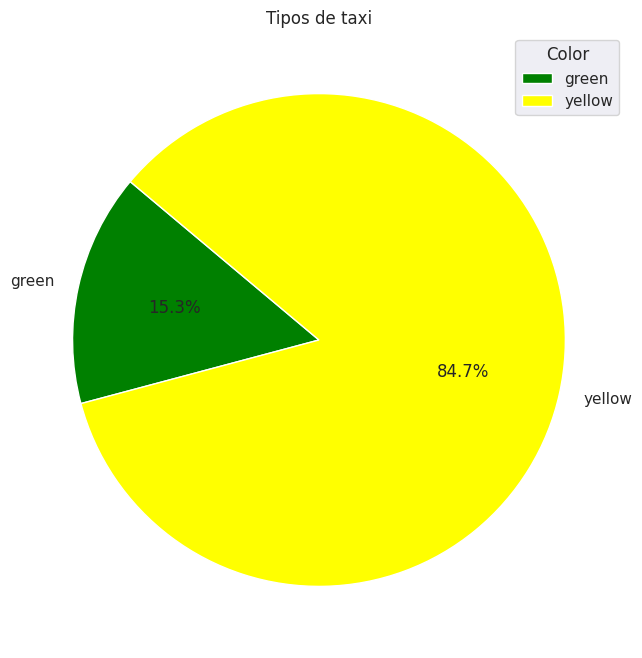

In [13]:
#Grafico de torta
plt.figure(figsize=(8, 8))
colores = ['green', 'yellow']
plt.pie(Tipos_de_taxi['total'], labels=Tipos_de_taxi.index, autopct='%1.1f%%', startangle=140, colors=colores)

# titulo y leyenda
plt.title('Tipos de taxi')
plt.legend(Tipos_de_taxi.index, title='Color', loc='upper right')

plt.show()


### Otros indicadores, por tipo de Taxi

Indicar cual es la distancia promedio, la tarifa máxima, mínima y promedio de cada tipo de Taxi.

In [14]:
# Agrupar por tipo de taxi y calcular estadísticas
df_tipo_de_taxi = df_sinnulos.groupby('color').agg({'distancia': ['mean'], 'tarifa': ['max', 'min', 'mean']})

# Renombrar columnas para mayor claridad
df_tipo_de_taxi.columns = ['distancia_promedio', 'tarifa_maxima', 'tarifa_minima', 'tarifa_promedio']

print(df_tipo_de_taxi)


        distancia_promedio  tarifa_maxima  tarifa_minima  tarifa_promedio
color                                                                    
green             3.412665           93.5            2.5        13.974329
yellow            2.922948          150.0            1.0        12.692205


### Tipos de pago

Indicar cual es el tipo de pago más utilizado, y cual es el monto promedio (sacado de la columna `total`) cobrado por cada tipo de pago.

In [15]:
# Colocar el código debajo de este comentario
tipo_pago_mas_utilizado = df_sinnulos['pago'].mode()[0]

#monto promedio
montos_promedio = df_sinnulos.groupby('pago')['total'].mean()

print("Tipo de pago más utilizado:", tipo_pago_mas_utilizado)
print("\nMontos promedio por tipo de pago:")
print(montos_promedio)

Tipo de pago más utilizado: credit card

Montos promedio por tipo de pago:
pago
cash           14.341632
credit card    19.877288
Name: total, dtype: float64


### Origenes y destinos

Indicar cuántos viajes hay por cada ciudad (`barrio_subida`) y por cada zona (`zona_subida`)

Determinar, del total de viajes, cuántos son dentro del mismo barrio y cuántos son entre barrios diferentes.

In [16]:
#pd.set_option('display.max_rows', None)

In [17]:
# Colocar el código debajo de este comentario

#Contar los viajes por ciudad
viajes_por_ciudad = df_sinnulos['barrio_subida'].value_counts()

# Contar los viajes por zona
viajes_por_zona = df_sinnulos['zona_subida'].value_counts()

# contar los viajes dentro del mismo barrio y diferentes
viajes_dentro_del_mismo_barrio = df_sinnulos[df_sinnulos['barrio_subida'] == df_sinnulos['barrio_bajada']]
viajes_entre_barrios_diferentes = df_sinnulos[df_sinnulos['barrio_subida'] != df_sinnulos['barrio_bajada']]

cantidad_viajes_dentro_del_mismo_barrio = len(viajes_dentro_del_mismo_barrio)
cantidad_viajes_entre_barrios_diferentes = len(viajes_entre_barrios_diferentes)


print("Viajes por ciudad:")
print(viajes_por_ciudad)

print("\nViajes por zona:")
print(viajes_por_zona)

print("\nViajes dentro del mismo barrio:", cantidad_viajes_dentro_del_mismo_barrio)
print("Viajes entre barrios diferentes:", cantidad_viajes_entre_barrios_diferentes)


Viajes por ciudad:
Manhattan    5226
Queens        638
Brooklyn      378
Bronx          99
Name: barrio_subida, dtype: int64

Viajes por zona:
Midtown Center                  227
Penn Station/Madison Sq West    209
Upper East Side South           208
Clinton East                    208
Midtown East                    196
                               ... 
Highbridge Park                   1
Brighton Beach                    1
Bronx Park                        1
Crotona Park East                 1
Hillcrest/Pomonok                 1
Name: zona_subida, Length: 194, dtype: int64

Viajes dentro del mismo barrio: 5545
Viajes entre barrios diferentes: 796


### Evolución de viajes durante el día

Indicar gráficamente cómo se distribuyen los viajes a lo largo de 24 horas (usar la columna `hora_subida`)

<ipython-input-18-7e4f8e5547fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinnulos['hora_subida'] = df_sinnulos['hora_subida'].apply(lambda x: x.hour)


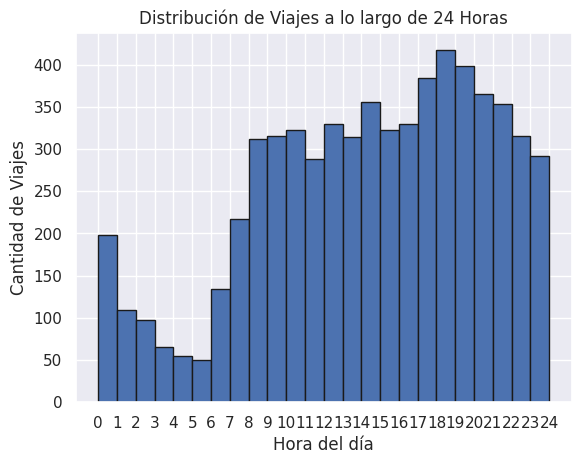

In [18]:

# Convertimos las horas de datetime a enteros
df_sinnulos['hora_subida'] = df_sinnulos['hora_subida'].apply(lambda x: x.hour)

# Histograma
plt.hist(df_sinnulos['hora_subida'], bins=24, range=(0, 24), edgecolor='k')
#plt.plot(df['hora_subida'])
# Personalizamos
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de Viajes')
plt.title('Distribución de Viajes a lo largo de 24 Horas')
plt.xticks(range(0, 25))
plt.grid(True)

plt.show()


### Evolución de la facturación en el tiempo

Indicar gráficamente como evoluciona la facturación (total por día) a lo largo del tiempo (usar las fechas ordenadas ascendente)

In [19]:
# Colocar el código debajo de este comentario
df_sinnulos.head()
#vemos el df para analizar que datos usar

,fecha_hora_subida,fecha_hora_bajada,pasajeros,distancia,tarifa,propina,peajes,total,color,pago,zona_subida,zona_bajada,barrio_subida,barrio_bajada,fecha,hora_subida,hora_bajada,duracion
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,2019-03-23,20,20:27:24,0 days 00:06:15
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,2019-03-04,16,16:19:00,0 days 00:07:05
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,2019-03-27,17,18:00:25,0 days 00:07:24
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,2019-03-10,1,01:49:51,0 days 00:25:52
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,2019-03-30,13,13:37:14,0 days 00:09:32


In [20]:
# facturacion por dia
facturacion = df_sinnulos.groupby(df['fecha_hora_bajada'].dt.date)['total'].sum()

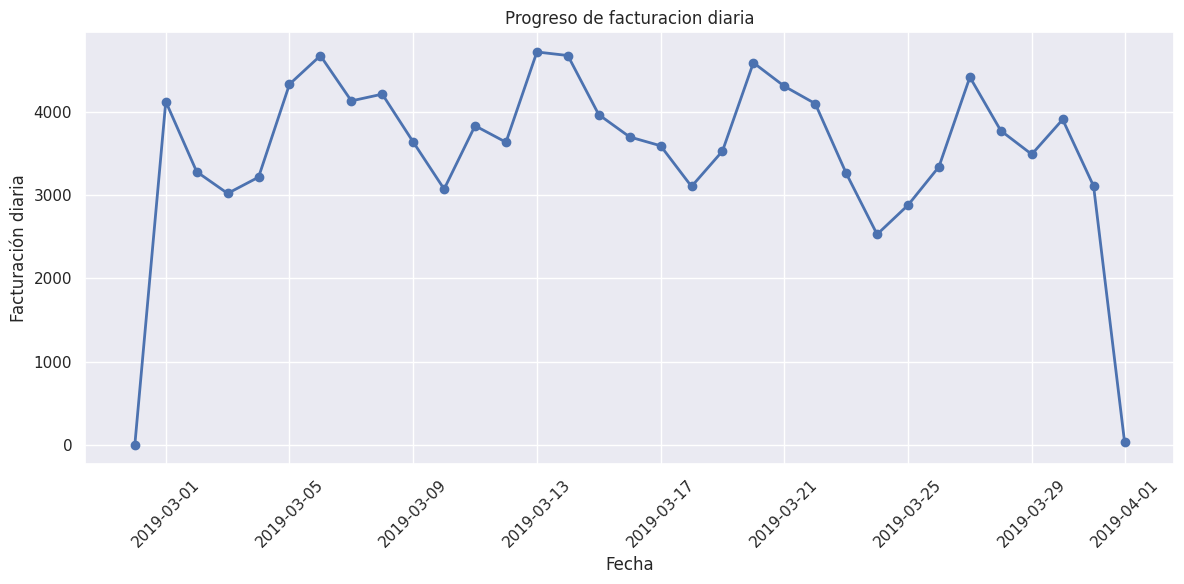

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(facturacion.index, facturacion.values, marker='o', linestyle='-', color='b', markersize=6, linewidth=2)

# Personalizamos
plt.title('Progreso de facturacion diaria')
plt.xlabel('Fecha')
plt.ylabel('Facturación diaria')
plt.grid(True)

plt.xticks(rotation=45)  # Para rotar las etiquetas del eje x si es necesario
plt.tight_layout()
plt.show()

### Costo de la tarifa

Determinar el costo promedio por milla de los viajes realizados en Manhattan.

In [22]:
# Colocar el código debajo de este comentario
# Filtra los viajes que se realizaron en Manhattan
manhattan = df[(df['barrio_subida'] == 'Manhattan') & (df['barrio_bajada'] == 'Manhattan')]



In [23]:
# Ccosto promedio en manhattan
manhattan_mean = manhattan['total'].mean() / manhattan['distancia'].mean()

print(f"El costo promedio por milla en Manhattan es: ${manhattan_mean:.2f} por milla")

El costo promedio por milla en Manhattan es: $8.05 por milla


### La mejor zona...

¿En qué zona debería circular un Taxi para tener posibilidades de recibir propinas altas? (utilizar la columna `zona_subida`)

In [24]:
# Colocar el código debajo de este comentario
df_sinnulos.head(10)

,fecha_hora_subida,fecha_hora_bajada,pasajeros,distancia,tarifa,propina,peajes,total,color,pago,zona_subida,zona_bajada,barrio_subida,barrio_bajada,fecha,hora_subida,hora_bajada,duracion
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,2019-03-23,20,20:27:24,0 days 00:06:15
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,2019-03-04,16,16:19:00,0 days 00:07:05
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,2019-03-27,17,18:00:25,0 days 00:07:24
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,2019-03-10,1,01:49:51,0 days 00:25:52
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,2019-03-30,13,13:37:14,0 days 00:09:32
5,2019-03-11 10:37:23,2019-03-11 10:47:31,1,0.49,7.5,2.16,0.0,12.96,yellow,credit card,Times Sq/Theatre District,Midtown East,Manhattan,Manhattan,2019-03-11,10,10:47:31,0 days 00:10:08
6,2019-03-26 21:07:31,2019-03-26 21:17:29,1,3.65,13.0,2.00,0.0,18.80,yellow,credit card,Battery Park City,Two Bridges/Seward Park,Manhattan,Manhattan,2019-03-26,21,21:17:29,0 days 00:09:58
8,2019-03-23 11:48:50,2019-03-23 12:06:14,1,3.63,15.0,1.00,0.0,19.30,yellow,credit card,East Harlem South,Midtown Center,Manhattan,Manhattan,2019-03-23,11,12:06:14,0 days 00:17:24
9,2019-03-08 16:18:37,2019-03-08 16:26:57,1,1.52,8.0,1.00,0.0,13.30,yellow,credit card,Lincoln Square East,Central Park,Manhattan,Manhattan,2019-03-08,16,16:26:57,0 days 00:08:20
10,2019-03-16 10:02:25,2019-03-16 10:22:29,1,3.90,17.0,0.00,0.0,17.80,yellow,cash,LaGuardia Airport,Astoria,Queens,Queens,2019-03-16,10,10:22:29,0 days 00:20:04


In [25]:
# promedio de las propinas por zona
propina_promedio_por_zona = df_sinnulos.groupby('zona_subida')['propina'].mean()

#zonas con las propinas más altas
zonas_con_propinas_altas = propina_promedio_por_zona.sort_values(ascending=False)

print("Zonas con propinas más altas:")
print(zonas_con_propinas_altas.head())

Zonas con propinas más altas:
zona_subida
Flushing Meadows-Corona Park    10.000000
Bronx Park                       8.390000
JFK Airport                      6.055634
LaGuardia Airport                5.657972
South Ozone Park                 5.530000
Name: propina, dtype: float64


### Pero sólo de día...

Mejorar el caso anterior, teniendo en cuenta que el chofer solamente quiere trabajar entre las 8:00 y las 16:00 hs. ¿Se mantiene la misma zona o le conviene trabajar en otra zona?

In [26]:
# Colocar el código debajo de este comentario

df_sinnulos['fecha_hora_subida'] = pd.to_datetime(df_sinnulos['fecha_hora_subida'])

# Filtrar los viajes (8: y 16 hs)
viajes_en_horario_laboral = df_sinnulos[(df_sinnulos['fecha_hora_subida'].dt.hour >= 8) & (df_sinnulos['fecha_hora_subida'].dt.hour < 16)]

#promedio de las propinas para cada zona
propina_promedio_por_zona = viajes_en_horario_laboral.groupby('zona_subida')['propina'].mean()
zonas_con_propinas_altas = propina_promedio_por_zona.sort_values(ascending=False)

print("Zonas con propinas más altas durante el horario laboral:")
print(zonas_con_propinas_altas.head())

Zonas con propinas más altas durante el horario laboral:
zona_subida
LaGuardia Airport     6.388485
DUMBO/Vinegar Hill    5.372500
JFK Airport           5.073143
World Trade Center    3.524444
Battery Park City     3.223333
Name: propina, dtype: float64


<ipython-input-26-175695de5c89>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinnulos['fecha_hora_subida'] = pd.to_datetime(df_sinnulos['fecha_hora_subida'])


Le conviene trabajar en LaGuardia Airport en la franja de 8 a 16 hs, ya que en promedio con los datos obtenidos ese lugar deja mas propina.


### Correlación

Graficar la correlación entre las siguientes variables:

* Pasajeros
* Distancia
* Tarifa
* Propina

¿Podemos sacar alguna conclusión a partir del gráfico?

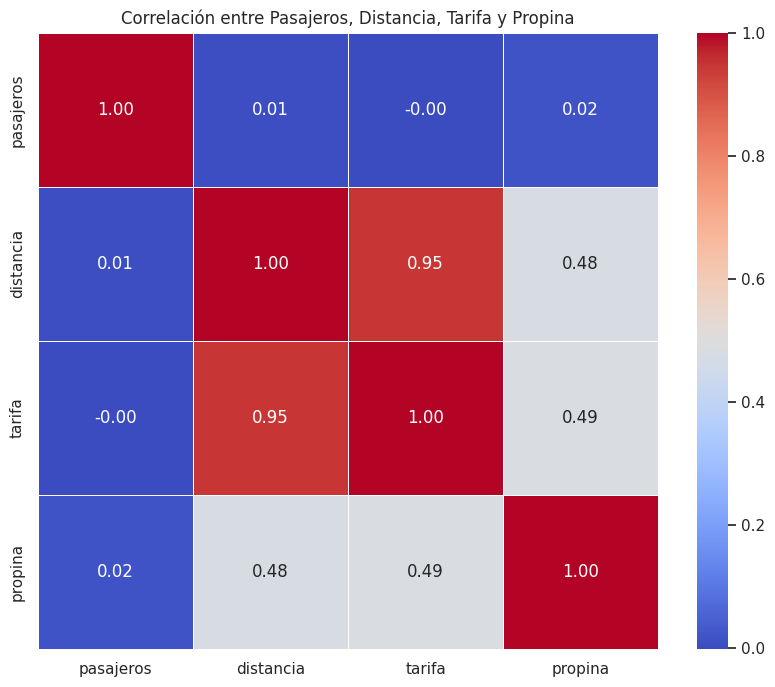

In [27]:
#matriz de correlación
correlación = df_sinnulos[['pasajeros', 'distancia', 'tarifa', 'propina']].corr()

# Creamos un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlación, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlación entre Pasajeros, Distancia, Tarifa y Propina')
plt.show()

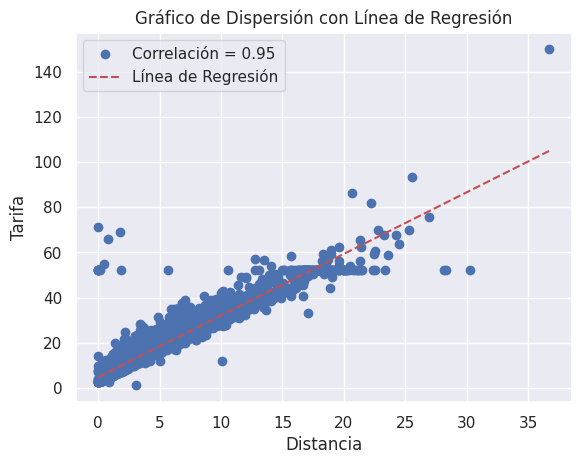

In [28]:
import numpy as np

x = df_sinnulos['distancia']
y = df_sinnulos['tarifa']

correlacion = np.corrcoef(x, y)[0, 1]

plt.scatter(x, y, label=f'Correlación = {correlacion:.2f}', color='b', marker='o')

coef = np.polyfit(x, y, 1)
linea_regresion = np.poly1d(coef)
x_regresion = np.linspace(min(x), max(x), 100)
y_regresion = linea_regresion(x_regresion)

plt.plot(x_regresion, y_regresion, color='r', linestyle='--', label='Línea de Regresión')

plt.xlabel('Distancia')
plt.ylabel('Tarifa')
plt.title('Gráfico de Dispersión con Línea de Regresión')

plt.legend()

plt.show()




## Del grafico se puede destacar la relacion entre tarifa y distancia. La cual tiene sentido ya que a mayor distancia, mayor es la tarifa, sin embargo no podemos decir que la propina dependa de algunas de las otras variables por ejemplo.

<ipython-input-29-f7831c862b46>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=2)


<Axes: >

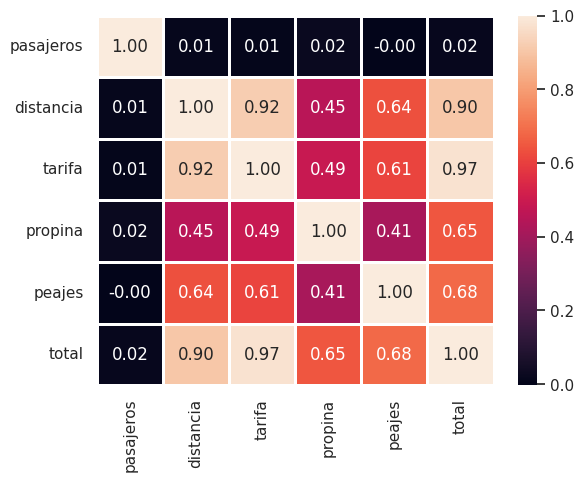

In [29]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=2)
# Vista general del df y sus correlaciones. Nada concluyente mas alla de distancia y tarifa. Excepto que hay una cierto grado de correlacion entre distancia y peajes,
# lo cual tiene sentido que muchos de los viajes largos tengan que cruzar un peaje pero no la correlacion no es suficiente para tenerlo en cuenta.